In [3]:
# Titanic 구현

import numpy as np
import pandas as pd
import tensorflow as tf

# Raw Data Loading
df = pd.read_csv('data/titanic/train.csv')

# 학습에 필요하지 않은 column은 삭제할 꺼예요!
df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], 
        axis=1, 
        inplace=True)
# display(df)

# 성별처리
gender_mapping = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(gender_mapping)

# 가족처리
df['Family'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
# display(df)

# 결측치 처리
# df.isnull().sum()
# Embarked 결측치 처리
df['Embarked'] = df['Embarked'].fillna('Q')
# Embarked 문자를 숫자로 변환
embarked_mapping = {'S': 0, 'C': 1, 'Q':2 }
df['Embarked'] = df['Embarked'].map(embarked_mapping)

# Age 결측치 처리
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Age Binning 처리(Numerical value -> Categorical value)
df.loc[df['Age'] < 8,'Age'] = 0
df.loc[(df['Age'] >= 8) & (df['Age'] < 20),'Age'] = 1
df.loc[(df['Age'] >= 20) & (df['Age'] < 65),'Age'] = 2
df.loc[df['Age'] >= 65,'Age'] = 3

# display(df.shape)

# 학습과 validation을 수행해야 해요!
# 데이터를 7:3 비율로 Training Data Set과 Validation Data Set으로 분리
train_data = df.iloc[:int(df.shape[0] * 0.7)]
val_data = df.iloc[int(df.shape[0] * 0.7):]

# Training Data Set
train_x_data = train_data.drop(['Survived'], axis=1, inplace=False).values
train_t_data = train_data['Survived'].values.reshape(-1,1)

# Validation Data Set
val_x_data = val_data.drop(['Survived'], axis=1, inplace=False).values
val_t_data = val_data['Survived'].values.reshape(-1,1)

#######################

# Tensorflow 구현

# placeholder
X = tf.placeholder(shape=[None,5], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weigth & bias
W = tf.Variable(tf.random.normal([5,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,
                                                              labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(300000):
    _, W_val, b_val, loss_val = sess.run([train,W,b,loss], 
                                         feed_dict={X: train_x_data,
                                                    T: train_t_data})
    if step % 30000 == 0:
        print('W:{}, b:{}. loss:{}'.format(W_val,b_val,loss_val))

W:[[-0.05427659]
 [ 0.00701545]
 [ 0.7620886 ]
 [-0.5049089 ]
 [ 0.23032819]], b:[-0.09035717]. loss:1.0398504734039307
W:[[-0.4692406 ]
 [ 0.33104324]
 [ 0.38213354]
 [-0.31306675]
 [ 0.09335237]], b:[-0.20169176]. loss:0.6275464296340942
W:[[-0.49284774]
 [ 0.64801925]
 [ 0.292542  ]
 [-0.12847602]
 [ 0.08080075]], b:[-0.16279681]. loss:0.5790870785713196
W:[[-0.5086747 ]
 [ 0.91347855]
 [ 0.21454765]
 [ 0.00632551]
 [ 0.06273412]], b:[-0.1259916]. loss:0.5467506051063538
W:[[-0.5213084 ]
 [ 1.1374252 ]
 [ 0.14749122]
 [ 0.10347669]
 [ 0.04543357]], b:[-0.0904434]. loss:0.5247446894645691
W:[[-0.532125  ]
 [ 1.3277742 ]
 [ 0.09035727]
 [ 0.17330202]
 [ 0.02952874]], b:[-0.05565356]. loss:0.509380042552948
W:[[-0.54266655]
 [ 1.4909816 ]
 [ 0.04209569]
 [ 0.22368465]
 [ 0.01511404]], b:[-0.02115936]. loss:0.49835121631622314
W:[[-5.5229437e-01]
 [ 1.6317717e+00]
 [ 7.4413756e-04]
 [ 2.6011181e-01]
 [ 1.7917494e-03]], b:[0.01287812]. loss:0.49023911356925964
W:[[-0.5614085 ]
 [ 1.75384

In [4]:
# 정확도(Accuracy) 측정
predict = tf.cast(H > 0.5, dtype=tf.float32)  # 예측값 : [1 0 0 0 1 0 1 0]
correct = tf.equal(predict, T) # T : [1 1 0 0 ..]   =>  [True, False, ...]  
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

accuracy_val = sess.run(accuracy, feed_dict={X:val_x_data,
                                             T:val_t_data})
print('모델의 정확도 : {}'.format(accuracy_val))

모델의 정확도 : 0.7947761416435242


In [12]:
df = pd.read_csv('data/bmi.csv')

In [27]:
# Multinomial Classification
# %reset

# Tensorflow로 구현해 보아요!
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Raw Data Loading
df = pd.read_csv('data/bmi.csv')

# display(df.head(), df.shape)

### 결측치 처리 ###
# df.isnull().sum()   # 결측치가 존재하지 않아요!

### 이상치 처리 ###


In [28]:
df[df['label']=='thin']=0
df[df['label']=='normal']=1
df[df['label']=='fat']=2

In [29]:
df['label']

0        1
1        2
2        0
3        2
4        1
        ..
19995    0
19996    2
19997    1
19998    1
19999    1
Name: label, Length: 20000, dtype: object

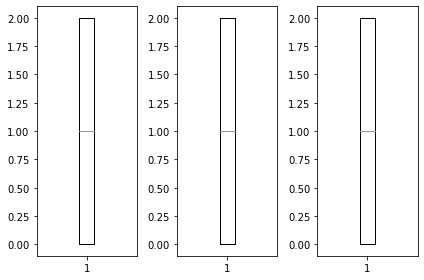

In [30]:
fig = plt.figure()
fig_1 = fig.add_subplot(1,3,1)
fig_2 = fig.add_subplot(1,3,2)
fig_3 = fig.add_subplot(1,3,3)

fig_1.boxplot(df['label'])
fig_2.boxplot(df['height'])
fig_3.boxplot(df['weight'])

fig.tight_layout()
plt.show()


In [31]:
### boxplot을 이용해서 이상치가 존재하는지를 확인해요!!
### 이상치는 현재 존재하지 않아요!

### Training Data Set
x_data = df[['height', 'weight']].values
t_data = df['label'].values  # one hot encoding으로 변환
###      [0 1 2 0 1 1 2 2 0 1]
###      [[1 0 0]
###       [0 1 0]
###       [0 0 1]
###       [1 0 0]]

### 정규화
scaler_x = MinMaxScaler()
scaler_x.fit(x_data)
norm_x_data = scaler_x.transform(x_data)
# print(norm_x_data)

### tensorflow 기능을 이용해서 one hot encoding을 생성
sess = tf.Session()
norm_t_data = sess.run(tf.one_hot(t_data, depth=3))
# print(norm_t_data)

## training data set 준비 끝


In [32]:


## tensorflow 구현
# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
T = tf.placeholder(shape=[None,3], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([2,3]), name='weight')
b = tf.Variable(tf.random.normal([3]), name='bias')

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)   # Softmax Activation function 이용

# loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)

# 초기화
sess.run(tf.global_variables_initializer())

# 학습진행
for step in range(30000):
    _, W_val, b_val, loss_val = sess.run([train,W,b,loss], 
                                         feed_dict={X:norm_x_data,
                                                    T:norm_t_data})
    if step % 3000 == 0:
        print('W : {}, b: {}, loss: {}'.format(W_val, b_val, loss_val))
        
        

W : [[-0.74057055  0.46742615  0.05792918]
 [-0.08616608 -1.0153077   1.6942377 ]], b: [ 0.39123935 -1.5441076  -2.505711  ], loss: 1.0482169389724731
W : [[-0.82522815  0.4930965   0.11691654]
 [-0.17082392 -0.98963755  1.7532248 ]], b: [ 0.2929184 -1.4928261 -2.458673 ], loss: 0.9241164326667786
W : [[-0.8967902   0.5161728   0.16540267]
 [-0.2423862  -0.9665612   1.8017111 ]], b: [ 0.21211253 -1.4466234  -2.4240723 ], loss: 0.8376342058181763
W : [[-0.9580207   0.5371062   0.20569955]
 [-0.30361676 -0.9456278   1.842008  ]], b: [ 0.14560139 -1.4048605  -2.3993242 ], loss: 0.7761402130126953
W : [[-1.0112319   0.5562318   0.23978521]
 [-0.3568274  -0.9265022   1.8760931 ]], b: [ 0.090605  -1.3670045 -2.3821762], loss: 0.7311422824859619
W : [[-1.0581918   0.5737859   0.26919106]
 [-0.40378878 -0.9089481   1.9054986 ]], b: [ 0.04491573 -1.33263    -2.370861  ], loss: 0.6972441077232361
W : [[-1.1002243   0.58995014  0.29505748]
 [-0.44581935 -0.8927839   1.9313651 ]], b: [ 0.00682436 

In [33]:
# 잘 만들어진 모델인지 확인하고 넘어가야 해요!(train, validation)

# prediction
height = 187
weight = 78
my_state = [[height, weight]]

result = sess.run(H, feed_dict={X:scaler_x.transform(my_state)})
print(result)  # 2 => 과체중 ?? 확인을 해 봐야 해요!

[[0.000000e+00 9.861656e-38 1.000000e+00]]
